In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

In [2]:
df = datasets.load_boston()

In [3]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
df.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [6]:
df.data.shape

(506, 13)

In [7]:
df.target.shape

(506,)

In [8]:
print(df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
X = df.data
y = df.target

In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X= sc.fit_transform(X)

In [11]:
# Splitting in to train test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=.2)

In [12]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [13]:
# Model Building without Hyper parameter tuning
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [14]:
y_pred = model.predict(X_test)

In [15]:
d1 = pd.DataFrame({"Actual": y_test, "Predicted":y_pred})
d1

,Actual,Predicted
0,29.9,26.70
1,13.2,13.70
2,17.8,19.18
3,17.2,13.96
4,50.0,42.32
...,...,...
97,50.0,33.68
98,17.9,9.20
99,50.0,38.76
100,34.9,29.62


In [16]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score : ", r2_score(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))

R2 Score :  0.7276199037437283
Mean Squared Error :  24.296858823529416


In [17]:
r2_Value = []
err_list = []
for i in range(1, 25):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_Value.append(r2)
    err_list.append(1-r2)

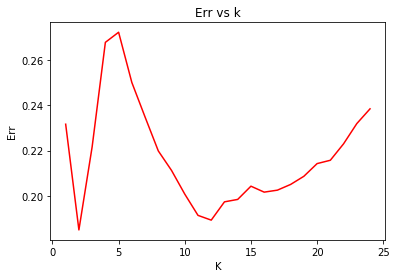

In [18]:
# plottintg the r2 vs k value
plt.plot(list(range(1,25)), err_list, c= "r")
plt.title("Err vs k")
plt.xlabel("K")
plt.ylabel("Err")
plt.show()

#### From the Above image we got to know that the value of k is 12



In [21]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [22]:
print("R2 score: ", r2_score(y_test, y_pred))

R2 score:  0.778343982829722
